# K-Nearest Neighbors

## References 

- https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
- https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html
- https://machinelearningexploration.readthedocs.io/en/latest/MathExploration/distances.html

## Dataset Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

plt.style.use('seaborn')

%matplotlib inline

In [2]:
n_samples = 100
X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_classes=2, class_sep=2,
                           n_clusters_per_class=1, random_state=888)

X.shape, y.shape

((100, 2), (100,))

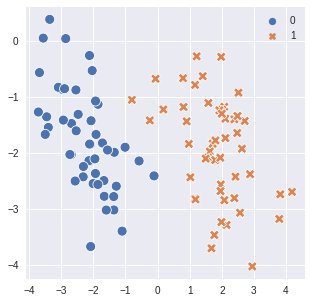

In [3]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1, 1, 1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax1, palette='deep', s=100)
plt.show()

## Assumption

- similar points have similar labels

## Algorithm

\begin{align*}
    & \text{Test Point } x\\
    & \text{k nearest neighbors }S_x \subseteq D \text{, such that } | S_x | = k\\
    \\
    & \forall (x',y') \in D \backslash S_x \implies \text{ part of dataset but not in nearest neighbors}\\
    & \text{distance } (x, x') \ge {max\atop{(x'', y'') \in S_x}} dist(x, x'')
\end{align*}


- In essence points that are not in k nearest neighbors than they must be farther than the test data points compared to the maximum distance from k nearest neighbors 
- labels of k nearest neighbors idenitfies test point's labels.
- knn is as good as the distance metric it uses.

## Implementation

In [4]:
from scipy.spatial import minkowski_distance

In [5]:
def k_nearest_neighbors(X, test_point, k):
    
    ## using minkowski distance with p2 (basically euclidean)
    distances = minkowski_distance(X, test_point, p=2)
    
    ## getting closest(lowest distance) point's indeces
    nearest_neighbors_indexes = np.argpartition(distances, k)[:k] 
    return nearest_neighbors_indexes

learn more about distances here - https://machinelearningexploration.readthedocs.io/en/latest/MathExploration/distances.html

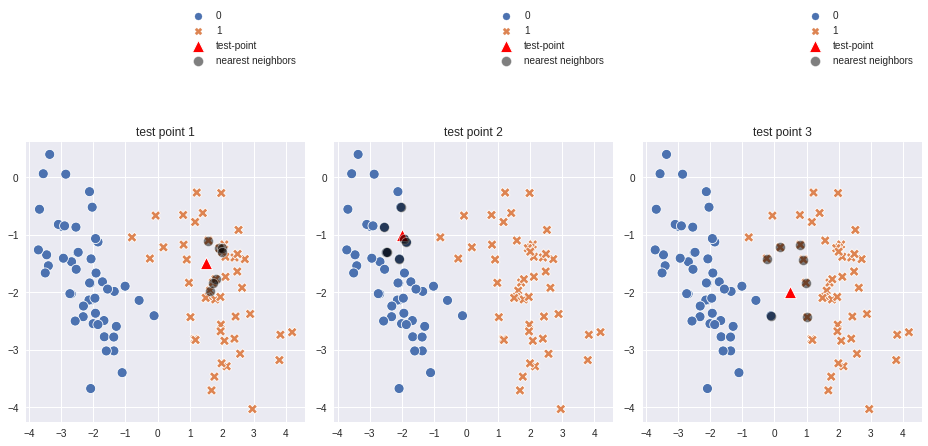

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(13, 7))

ax[0].set_title('test point 1')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax[0], palette='deep', s=100)

test_point1 = np.array([1.5, -1.5])
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point1, k = 7)

sns.scatterplot(x=test_point1[[0]], y=test_point1[[1]], color='r', ax=ax[0], palette='deep', marker='^', 
                s=150, label='test-point')
sns.scatterplot(x=X[nearest_neighbors_indexes,0], y=X[nearest_neighbors_indexes,1], color='k', ax=ax[0], 
                palette='deep', s=100, alpha=0.5, label='nearest neighbors')

ax[0].legend(bbox_to_anchor=(1, 1.5), loc='upper right')


ax[1].set_title('test point 2')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax[1], palette='deep', s=100)

test_point2 = np.array([-2, -1])
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point2, k = 7)

sns.scatterplot(x=test_point2[[0]], y=test_point2[[1]], color='r', ax=ax[1], palette='deep', marker='^', 
                s=150, label='test-point')
sns.scatterplot(x=X[nearest_neighbors_indexes,0], y=X[nearest_neighbors_indexes,1], color='k', ax=ax[1], 
                palette='deep', s=100, alpha=0.5, label='nearest neighbors')

ax[1].legend(bbox_to_anchor=(1, 1.5), loc='upper right')


ax[2].set_title('test point 3')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax[2], palette='deep', s=100)

test_point3 = np.array([0.5, -2])
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point3, k = 7)

sns.scatterplot(x=test_point3[[0]], y=test_point3[[1]], color='r', ax=ax[2], palette='deep', marker='^', 
                s=150, label='test-point')
sns.scatterplot(x=X[nearest_neighbors_indexes,0], y=X[nearest_neighbors_indexes,1], color='k', ax=ax[2], 
                palette='deep', s=100, alpha=0.5, label='nearest neighbors')

ax[2].legend(bbox_to_anchor=(1, 1.5), loc='upper right')

plt.tight_layout()
plt.show()

### In above plot

- test point 1 = [1.5, -1.5], resides in 1's area dominently and all 7 nearest neighbors are indicating 1 as label.

In [7]:
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point1, k = 7)
test_point1, y[nearest_neighbors_indexes]

(array([ 1.5, -1.5]), array([1, 1, 1, 1, 1, 1, 1]))

- test point 2 = [-2.0,-1,0], resides in 0's area dominently and all k nearest neighbors are indicating 0 as label.

In [8]:
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point2, k = 7)
test_point2, y[nearest_neighbors_indexes]

(array([-2, -1]), array([0, 0, 0, 0, 0, 0, 0]))

- test point 3 = [0.5, -2], resides in somewhat center of the plot and due to euclidean distance calculation algorithm 6 out of 7 nearest neighbors have label as 1.

In [9]:
nearest_neighbors_indexes = k_nearest_neighbors(X, test_point3, k = 7)
test_point3, y[nearest_neighbors_indexes]

(array([ 0.5, -2. ]), array([1, 1, 1, 0, 1, 1, 1]))